# Anderson Alves Schinaid
### Processamento de Linguagem Natural


In [1]:
# Instalação/atualização do spaCy e dos modelos de língua
!pip install -U spacy

!python -m spacy download pt_core_news_sm  # Notar o "sm": Small Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13

In [2]:
# Importação do módulo e do modelo de língua
import spacy
!python -m spacy info  # P/ checar a versão (tem de ser >= 3.0)
nlp = spacy.load('pt_core_news_sm')

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)

============================== Info about spaCy ==============================

spaCy version    3.8.4                         
Location         /usr/local/lib/python3.11/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.11.11                       
Pipelines        pt_core_news_sm (3.8.0), en_core_web_sm (3.7.1)



# Atividade 01
Vamos trabalhar com a leitura de um arquivo de texto bruto e aplicação do pipeline completo de pré-processamento dos dados e a contagem das unidades lexicais que vimos até agora. Usaremos o livro "O Guarani", de José de Alencar, que está disponível para download na plataforma AlunoWeb.

**Exercícios**

1. Abra o arquivo "Guarani.txt" e calcule:

*   O número total de caracteres
*   O número de caracteres sem espaços em branco
*   O número de palavras (dica: para um trabalho de boa qualidade, tokenize e limpe o texto)


2. Mostre as 20 palavras mais frequentes do texto em ordem descrescente de ocorrência.

* Dica: use a função Counter() da biblioteca `collections`.

3. Discuta o resultado. Qual a característica mais evidente dessas palavras frequentes?

4. Calcule:
*   O vocabulário do livro (o número de lemas)

5. Reduza os tokens a raízes.
* O conjunto das raízes é maior ou menor que o vocabulário (de lemas)?
* Discuta as vantagens e os riscos implicados no uso de um ou outro.


6. Crie uma lista dos hápax legômena e responda:
* Qual a proporção de hápax legômena no vocabulário?
* Exiba os 50 primeiros hápax legômena da sua lista. Baseando-se no que você vê, será que existem traços em comum entre eles?  Discuta se poderiam ser eliminados sem prejuízo para uma análise do conteúdo do texto.

7. Crie uma versão do livro "privilegiando o conteúdo": uma lista sem hápax legômena, sem palavras vazias e com as palavras restantes stemizadas.
* Compare o número de tokens desse "livro" com o primeiro cálculo de tokens, aquele sobre o texto original.


# Bônus: Geração de nuvens de palavras

### 1 - Importação e edição do Livro GUARANI

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
processamento='/content/drive/MyDrive/PECE/Processamento Linguagem Natural/'
data= processamento + 'data/'
file='Guarani.txt'

In [12]:
def read_text(path, file):
    """
    Função para abrir e ler o conteúdo de um arquivo de texto.

    Parâmetros:
    path (str): Caminho do arquivo a ser lido.

    Retorna:
    str: O conteúdo completo do arquivo como uma string, ou None em caso de erro.
    """
    try:
        # Abre o arquivo no modo de leitura ('r') com codificação UTF-8
        with open(path + file, 'r', encoding='utf-8') as file:
            # Lê todo o conteúdo do arquivo e armazena em uma variável
            text = file.read()
        return text  # Retorna o conteúdo lido como string
    except FileNotFoundError:
        print(f"Erro: O arquivo '{path}' não foi encontrado.")
        return None
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None

In [15]:
texto = read_text(data, file)

In [21]:
def count_words(text):
    """
    Função para contar o número total de caracteres e exibir essa informação.

    Parâmetros:
    text (str): O texto a ser analisado.

    Retorna:
    int: O número total de caracteres no texto.
    """
    # Verifica se o texto não está vazio ou é None
    if not text:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None

    # 1.2. Contar o número total de caracteres no texto
    num_caracteres = len(text)

    # Exibir o número total de caracteres
    print(f'O número total de caracteres no arquivo é: {num_caracteres}')

    return num_caracteres  # Retorna a contagem total de caracteres

In [81]:
total_chars = count_words(texto)

O número total de caracteres no arquivo é: 626296


In [25]:
def count_chars_without_spaces(text):
    """
    Função para contar o número de caracteres em um texto, excluindo espaços em branco.

    Parâmetros:
    text (str): O texto a ser analisado.

    Retorna:
    int: O número de caracteres sem espaços em branco.
    """
    # Verifica se o texto não está vazio ou é inválido
    if not text:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None

    # Remove todos os espaços em branco do texto e conta os caracteres restantes
    num_caracteres_sem_espacos = len(text.replace(" ", ""))

    # Exibir o número total de caracteres sem espaços
    print(f'O número total de caracteres sem espaços em branco no arquivo é: {num_caracteres_sem_espacos}')

    return num_caracteres_sem_espacos  # Retorna a contagem dos caracteres sem espaços

In [79]:
total_chars_no_spaces = count_chars_without_spaces(texto)

O número total de caracteres sem espaços em branco no arquivo é: 523030


In [28]:
# 1.4. O número de palavras (dica: para um trabalho de boa qualidade, tokenize e limpe o texto)

def tokenize_text(text):
    """
    Função para tokenizar e limpar um texto, removendo pontuação e caracteres desnecessários.

    Parâmetros:
    text (str): O texto a ser tokenizado.

    Retorna:
    list: Uma lista contendo os tokens do texto processado.
    """
    # Verifica se o texto é válido
    if not text:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None

    # Processa o texto com spaCy
    doc = nlp(text)

    # Gera uma lista de tokens válidos (excluindo pontuação e espaços extras)
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]

    # Exibir os primeiros 20 tokens para verificação
    print(f"Exemplo de tokens gerados: {tokens[:20]}")

    return tokens  # Retorna a lista de tokens

In [78]:
tokens = tokenize_text(texto)

Exemplo de tokens gerados: ['O', 'Guarani', 'de', 'José', 'de', 'Alencar', 'Fonte', 'ALENCAR', 'José', 'de', 'O', 'guarani', '20a', 'ed.', 'São', 'Paulo', 'Ática', '1996', 'Bom', 'Livro']


In [36]:
def clean_tokens(token_list):
    """
    Função para limpar uma lista de tokens, convertendo para minúsculas e removendo símbolos não alfabéticos.

    Parâmetros:
    token_list (list): Lista de tokens a serem limpos.

    Retorna:
    list: Lista de tokens limpos, contendo apenas palavras alfabéticas em minúsculas.
    """
    # Verifica se a lista de tokens é válida
    if not token_list or not isinstance(token_list, list):
        print("Erro: A lista de tokens fornecida está vazia ou é inválida.")
        return None

    # Converte para minúsculas e remove tokens que não são compostos apenas por letras (exclui números, pontuação, etc.)
    cleaned_tokens = [token.lower() for token in token_list if token.isalpha()]

    # Exibir os primeiros 20 tokens limpos para verificação
    print(f"Exemplo de tokens limpos: {cleaned_tokens[:20]}")

    return cleaned_tokens  # Retorna a lista de tokens limpos


In [76]:
tokens = tokenize_text(texto)  # Tokenizando o texto
cleaned_tokens = clean_tokens(tokens)  # Limpando os tokens

Exemplo de tokens gerados: ['O', 'Guarani', 'de', 'José', 'de', 'Alencar', 'Fonte', 'ALENCAR', 'José', 'de', 'O', 'guarani', '20a', 'ed.', 'São', 'Paulo', 'Ática', '1996', 'Bom', 'Livro']
Exemplo de tokens limpos: ['o', 'guarani', 'de', 'josé', 'de', 'alencar', 'fonte', 'alencar', 'josé', 'de', 'o', 'guarani', 'são', 'paulo', 'ática', 'bom', 'livro', 'texto', 'proveniente', 'de']


In [39]:
def remove_stopwords(text, stopwords_extra=None):
    """
    Função para remover stopwords de um texto.

    Parâmetros:
    text (str): O texto a ser processado.
    stopwords_extra (set, opcional): Conjunto adicional de stopwords personalizadas.

    Retorna:
    tuple: (Texto sem stopwords, número de caracteres sem stopwords, lista de palavras sem stopwords)
    """
    # Verifica se o texto é válido
    if not text:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None, None, None

    # Carregar as stopwords padrão do spaCy para português
    stops_spacy = nlp.Defaults.stop_words

    # Se houver stopwords personalizadas, adicioná-las ao conjunto padrão
    if stopwords_extra:
        stops_spacy |= set(stopwords_extra)

    # Tokenizar o texto separando por espaços
    palavras = text.split()

    # Remover as stopwords do texto
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra.lower() not in stops_spacy]

    # Reunir as palavras limpas em um texto sem stopwords
    content_sem_stopwords = ' '.join(palavras_sem_stopwords)

    # Contar o número de caracteres no texto sem stopwords (ignorando espaços)
    num_caracteres_sem_stopwords = len(content_sem_stopwords.replace(" ", ""))

    # Exibir a contagem de caracteres sem stopwords
    print(f'O número total de caracteres sem as stopwords é: {num_caracteres_sem_stopwords}')

    return content_sem_stopwords, num_caracteres_sem_stopwords, palavras_sem_stopwords

In [75]:
content_clean, char_count, words_clean = remove_stopwords(texto, stopwords_extra={"d.", "—"})

O número total de caracteres sem as stopwords é: 369333


## 2 - Identificar as 20 Palavras mais frenquentes


In [42]:
from collections import Counter

def count_top_words(word_list, top_n=20):
    """
    Função para contar a frequência das palavras restantes e exibir as mais comuns.

    Parâmetros:
    word_list (list): Lista de palavras a serem analisadas.
    top_n (int, opcional): Número de palavras mais frequentes a serem exibidas (padrão: 20).

    Retorna:
    list: Lista de tuplas contendo as palavras mais frequentes e suas contagens.
    """
    # Verifica se a lista de palavras é válida
    if not word_list or not isinstance(word_list, list):
        print("Erro: A lista de palavras fornecida está vazia ou é inválida.")
        return None

    # Usa Counter para contar a frequência das palavras
    contador = Counter(word_list)

    # Obtém as 'top_n' palavras mais frequentes
    top_words = contador.most_common(top_n)

    # Exibir as palavras mais frequentes
    print(f"As {top_n} palavras mais frequentes (sem as stopwords):")
    for palavra, frequencia in top_words:
        print(f"{palavra}: {frequencia}")

    return top_words  # Retorna a lista das palavras mais frequentes com suas contagens

In [74]:
_, _, words_clean = remove_stopwords(texto, stopwords_extra={"d.", "—"})
top_words = count_top_words(words_clean)  # Conta as palavras mais frequentes

O número total de caracteres sem as stopwords é: 369333
As 20 palavras mais frequentes (sem as stopwords):
Peri: 504
tinha: 422
Cecília: 276
índio: 268
Antônio: 255
disse: 224
olhos: 186
havia: 182
Álvaro: 176
menina: 161
ia: 140
olhar: 133
fidalgo: 130
aventureiros: 127
italiano: 126
mão: 122
homem: 119
Isabel: 113
vida: 111
Peri,: 110


## 3 - Discuta o resultado. Qual a característica mais evidente dessas palavras frequentes?

#### Pelo teor das 20 palavras mais frenquentesse conta uma história que se passa por pessoas aventureiras e índios, alguns personagens aparecen com mais frequência, como Peri, Cecília e Antônio.

## 4 - Calcule o vocabulário do livro (o número de lemas)

In [45]:
# Baixando o modelo de língua grande (lg) para o português
!python -m spacy download pt_core_news_lg

nlp = spacy.load('pt_core_news_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [72]:
def lematizar(texto):
    """
    Função para lematizar um texto, reduzindo as palavras às suas formas básicas.

    Parâmetros:
    texto (str): O texto a ser lematizado.

    Retorna:
    list: Lista de lemas (formas básicas das palavras) extraídas do texto.
    """
    # Verifica se o texto é válido
    if not texto:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None

    # Processa o texto com spaCy
    doc = nlp(texto)

    # Gera uma lista de lemas (formas básicas das palavras)
    lemas = [token.lemma_ for token in doc]

    # Exibir os primeiros 20 lemas para verificação
    print(f"Exemplo de lemas gerados: {lemas[:20]}")

    return lemas  # Retorna a lista de lemas do texto

In [73]:
lemas = lematizar(texto)  # Lematiza o texto

Exemplo de lemas gerados: ['o', 'Guarani', ',', 'de', 'José', 'de', 'Alencar', '\n', 'Fonte', ':', '\n', 'ALENCAR', ',', 'José', 'de', '.', 'o', 'guarani', '.', '20a']


In [51]:
def calcular_vocabulario(texto):
    """
    Função para processar um texto com spaCy, obter os lemas e calcular o número de lemas únicos.

    Parâmetros:
    texto (str): O texto a ser processado.

    Retorna:
    tuple: (Conjunto de lemas únicos, número total de lemas únicos).
    """
    # Verifica se o texto é válido
    if not texto:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None, None

    # Processar o texto com spaCy
    doc = nlp(texto)

    # Obter os lemas (formas básicas das palavras), convertendo para minúsculas,
    # removendo stopwords e filtrando apenas palavras alfabéticas
    lemas = {token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha}

    # Calcular o número de lemas únicos
    num_lemas = len(lemas)

    # Exibir o número total de lemas únicos no vocabulário
    print(f'O vocabulário (número de lemas únicos) do texto é: {num_lemas}')

    return lemas, num_lemas  # Retorna o conjunto de lemas e o número total de lemas únicos


In [71]:
vocabulario, num_lemas = calcular_vocabulario(texto)  # Calcula os lemas únicos

O vocabulário (número de lemas únicos) do texto é: 6824


Reduza os tokens a raízes.
O conjunto das raízes é maior ou menor que o vocabulário (de lemas)?
Discuta as vantagens e os riscos implicados no uso de um ou outro.

## 5 - Reduza os tokens a raízes.

In [54]:
# Importação do módulo e dos recursos necessários
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [55]:
# Carregamento do stemizador
nltk.download('rslp')
raiz = nltk.stem.RSLPStemmer().stem


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [56]:
import nltk
from nltk.stem import RSLPStemmer

# Inicializa o Stemmer para português
stemmer = RSLPStemmer()

def calcular_raizes(texto):
    """
    Função para tokenizar um texto, aplicar stemming e calcular o número de raízes únicas.

    Parâmetros:
    texto (str): O texto a ser processado.

    Retorna:
    tuple: (Conjunto de raízes únicas, número total de raízes únicas).
    """
    # Verifica se o texto é válido
    if not texto:
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None, None

    # Tokenizar o texto (separar as palavras)
    tokens = nltk.word_tokenize(texto)

    # Aplicar stemming às palavras minúsculas e filtrar apenas palavras alfabéticas
    raizes = {stemmer.stem(palavra.lower()) for palavra in tokens if palavra.isalpha()}

    # Calcular o número de raízes únicas
    num_raizes = len(raizes)

    # Exibir o número total de raízes únicas no vocabulário
    print(f'O vocabulário (número de raízes únicas) do texto é: {num_raizes}')

    return raizes, num_raizes  # Retorna o conjunto de raízes únicas e seu tamanho


In [61]:
raizes_unicas, _ = calcular_raizes(texto)  # Obtém as raízes únicas

O vocabulário (número de raízes únicas) do texto é: 4670


**Análise:** O conjunto de palavras stemizadas é menor que o conjunto de palavras lematizadas, sendo importante a avaliar a aplicação. A primeira é mais eficiente computacionalmente, e pode ser muito útil quando se deseja buscar as palavras rapidamente por indexação, já a lematização mantém o sentido mais próximo do original da palavra.




## 6 - Análise Hápax Legômena

In [62]:
from collections import Counter

def calcular_hapax_legomena(raizes):
    """
    Função para contar a frequência de cada raiz e identificar os hápax legômena (palavras que aparecem apenas uma vez).

    Parâmetros:
    raizes (list): Lista de raízes extraídas do texto.

    Retorna:
    tuple: (Lista de hápax legômena, proporção de hápax no vocabulário, número total de raízes únicas).
    """
    # Verifica se a lista de raízes é válida
    if not raizes or not isinstance(raizes, list):
        print("Erro: A lista de raízes fornecida está vazia ou é inválida.")
        return None, None, None

    # Contar a frequência de cada raiz usando Counter
    frequencias = Counter(raizes)

    # Filtrar os hápax legômena (palavras que aparecem apenas uma vez)
    hapax_legomena = [palavra for palavra, freq in frequencias.items() if freq == 1]

    # Filtrar palavras que aparecem mais de uma vez
    hapax_sem_legomena = [palavra for palavra, freq in frequencias.items() if freq > 1]

    # Calcular o número total de raízes únicas
    num_raizes_unicas = len(frequencias)

    # Calcular o número de hápax legômena e não hápax
    num_hapax = len(hapax_legomena)
    num_sem_hapax = len(hapax_sem_legomena)

    # Calcular a proporção de hápax legômena no vocabulário
    proporcao_hapax = num_hapax / num_raizes_unicas if num_raizes_unicas > 0 else 0

    # Exibir os resultados
    print(f'Proporção de hápax legômena no vocabulário: {proporcao_hapax:.2f}')
    print(f'Número de hápax legômena: {num_hapax}')
    print(f'Número de palavras com mais de uma ocorrência: {num_sem_hapax}')
    print(f'Número total de raízes únicas no vocabulário: {num_raizes_unicas}')

    # Exibir os primeiros 50 hápax legômena
    print("\nOs primeiros 50 hápax legômena:")
    print(hapax_legomena[:50])

    return hapax_legomena, proporcao_hapax, num_raizes_unicas


In [63]:
hapax_legomena, proporcao_hapax, num_raizes_unicas = calcular_hapax_legomena(list(raizes_unicas))  # Calcula os hápax legômena

Proporção de hápax legômena no vocabulário: 1.00
Número de hápax legômena: 4670
Número de palavras com mais de uma ocorrência: 0
Número total de raízes únicas no vocabulário: 4670

Os primeiros 50 hápax legômena:
['furt', 'represent', 'soou', 'inóspit', 'partícul', 'houvéssel', 'galh', 'evangél', 'cour', 'exclam', 'sarcasm', 'carmel', 'merc', 'roj', 'monarc', 'prevenç', 'paus', 'metad', 'sulc', 'esmag', 'desemb', 'jaçanã', 'convenc', 'confess', 'sagü', 'igrej', 'escárni', 'desanim', 'resso', 'comprim', 'irresolut', 'catr', 'duel', 'caciqu', 'chuv', 'desdenh', 'vist', 'incumb', 'eflúvi', 'pajé', 'insubordin', 'abób', 'inabal', 'indíci', 'hom', 'horrend', 'respost', 'imin', 'signif', 'aventur']


## 7 - Nova versão do livro com tratamentos solicitados

In [65]:
def filtrar_e_stemizar(tokens, stopwords, hapax_legomena):
    """
    Função para remover stopwords e hápax legômena de uma lista de palavras, aplicando stemming às palavras restantes.

    Parâmetros:
    tokens (list): Lista de palavras tokenizadas.
    stopwords (set): Conjunto de stopwords a serem removidas.
    hapax_legomena (set): Conjunto de hápax legômena a serem removidos.

    Retorna:
    str: Texto filtrado com palavras stemizadas, sem stopwords e sem hápax legômena.
    """
    # Verifica se os dados são válidos
    if not tokens or not isinstance(tokens, list):
        print("Erro: A lista de tokens fornecida está vazia ou é inválida.")
        return None

    if not stopwords or not isinstance(stopwords, set):
        print("Erro: A lista de stopwords fornecida está vazia ou é inválida.")
        return None

    if not hapax_legomena or not isinstance(hapax_legomena, set):
        print("Erro: A lista de hápax legômena fornecida está vazia ou é inválida.")
        return None

    # Inicializa o Stemmer para português
    stemmer = RSLPStemmer()

    # Filtrar as palavras removendo stopwords e hápax legômena, e aplicar stemming
    filtered_tokens = [
        stemmer.stem(palavra.lower())  # Aplica stemming
        for palavra in tokens
        if palavra.isalpha() and palavra.lower() not in stopwords and palavra.lower() not in hapax_legomena
    ]

    # Juntar as palavras filtradas em um texto único
    texto_filtrado = ' '.join(filtered_tokens)

    # Exibir uma amostra do texto filtrado
    print(f'Texto filtrado (primeiros 500 caracteres): {texto_filtrado[:500]}...')

    return texto_filtrado  # Retorna o texto filtrado e stemizado

In [66]:
tokens = tokenize_text(texto)  # Tokenizando o texto
stopwords = nlp.Defaults.stop_words  # Obtendo as stopwords do spaCy
hapax_legomena, _, _ = calcular_hapax_legomena(tokens)  # Obtendo hápax legômena
texto_final = filtrar_e_stemizar(tokens, stopwords, set(hapax_legomena))  # Filtrando e stemizando

Exemplo de tokens gerados: ['O', 'Guarani', 'de', 'José', 'de', 'Alencar', 'Fonte', 'ALENCAR', 'José', 'de', 'O', 'guarani', '20a', 'ed.', 'São', 'Paulo', 'Ática', '1996', 'Bom', 'Livro']
Proporção de hápax legômena no vocabulário: 0.53
Número de hápax legômena: 6924
Número de palavras com mais de uma ocorrência: 6037
Número total de raízes únicas no vocabulário: 12961

Os primeiros 50 hápax legômena:
['Fonte', 'ALENCAR', '20a', 'ed.', 'Ática', '1996', 'Livro', 'Texto', 'Biblioteca', 'Virtual', 'Estudante', 'Brasileiro', 'http://www.bibvirt.futuro.usp.br', 'Escola', 'Futuro', 'Universidade', 'Permitido', 'educacionais', 'redistribuído', 'alterado', 'sejam', 'mantidas', 'patrocinadores', 'voluntários', 'manter', 'você', 'mande', 'e-mail', 'PRÓLOGO', 'Gostou', 'pede-me', 'literatura', 'Engana-se', 'impressionou', 'errar', 'exagerar-se', 'habilitado', 'remoçar', 'encontrei', 'armário', 'comprei', 'estragado', 'cupim', 'roedor', 'dilúvio', 'arca', 'cataclisma', 'Previno-lhe', 'encontrará',

## 8 - Análise Gráfica (Word Cloud)

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def gerar_nuvem_palavras(texto, stopwords):
    """
    Função para gerar e exibir uma nuvem de palavras a partir de um texto.

    Parâmetros:
    texto (str): O texto a ser processado para a nuvem de palavras.
    stopwords (set): Conjunto de stopwords a serem ignoradas na nuvem de palavras.

    Retorna:
    None: Apenas exibe a nuvem de palavras.
    """
    # Verifica se o texto é válido
    if not texto or not isinstance(texto, str):
        print("Erro: O texto fornecido está vazio ou é inválido.")
        return None

    if not stopwords or not isinstance(stopwords, set):
        print("Erro: A lista de stopwords fornecida está vazia ou é inválida.")
        return None

    # Gerar a nuvem de palavras
    nuvem = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800,
                      colormap="viridis").generate(texto)

    # Criar a figura e exibir a nuvem de palavras
    plt.figure(figsize=(10, 6))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")  # Remove os eixos
    plt.title("Nuvem de Palavras", fontsize=14)
    plt.show()

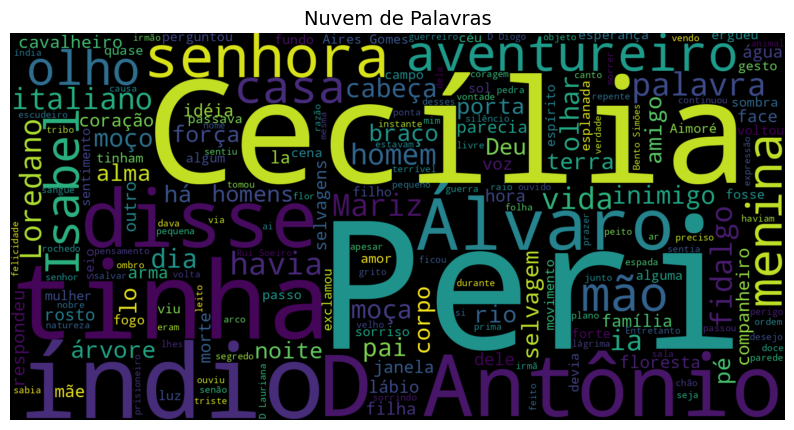

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [70]:
stopwords = nlp.Defaults.stop_words  # Obtendo stopwords do spaCy
gerar_nuvem_palavras(texto, stopwords)  # Gerando a nuvem de palavras